In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [32]:

df = pd.read_csv('C:/Users/arnab/OneDrive/Desktop/insurance.csv')

In [33]:
#first five rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
#last five rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [35]:
#number of rows and columns
df.shape

(1338, 7)

In [36]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Three categorical values :- sex, smoker, region

In [37]:
#checking for Missing Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [38]:
#statistical measure of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


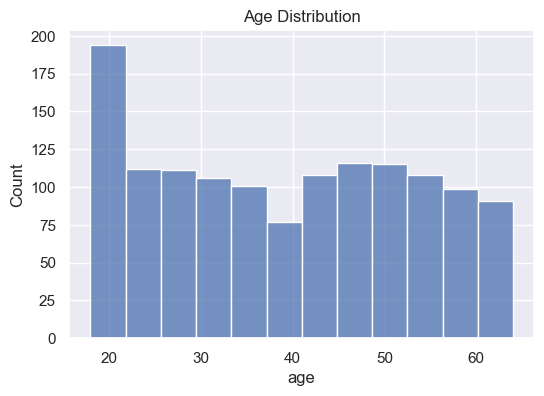

In [39]:
#Distribution of age values
sns.set()
plt.figure(figsize=(6,4))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

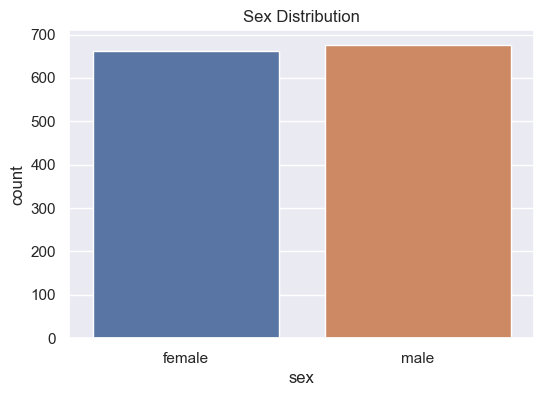

In [40]:
# Gender column
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [41]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

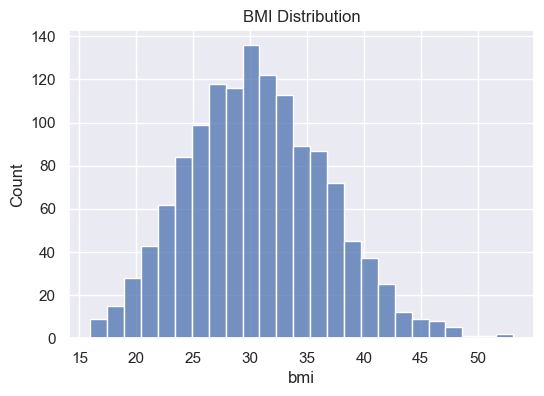

In [42]:
# bmi distribution
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

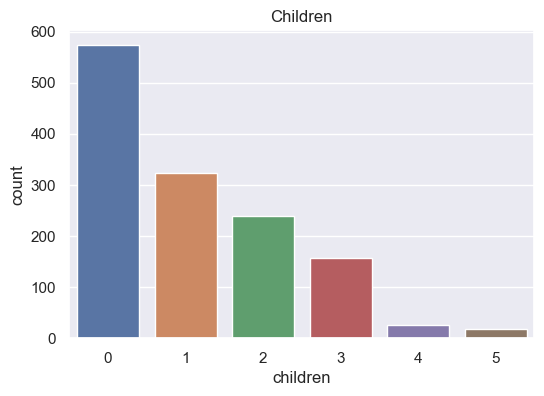

In [43]:
# children column
plt.figure(figsize=(6,4))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [44]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

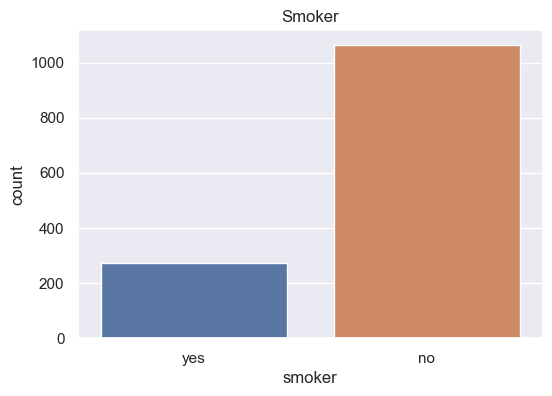

In [45]:
# Smoker column
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

In [46]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

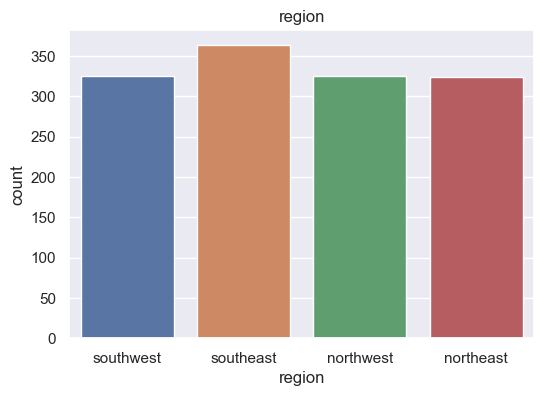

In [47]:
# region column
plt.figure(figsize=(6,4))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [48]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

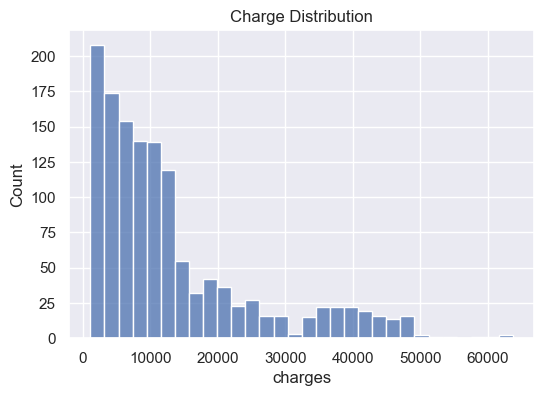

In [49]:
# charge distribution
plt.figure(figsize=(6,4))
sns.histplot(df['charges'])
plt.title('Charge Distribution')
plt.show()

## Data Pre-Processing

#### Encoding the categorical features

In [53]:
# encoding 'sex' column
df.replace({'sex':{'male':0 , 'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'smoker':{'yes':0 , 'no':1}}, inplace=True)

#encoding 'region' column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}})

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## Spliting the Features and Target

In [55]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [56]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [57]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Spliting the data into Training data & Testing data

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [95]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training

In [61]:
# Linear Regression

In [96]:
# loading the Linear Regression Model
regressor= LinearRegression()

In [97]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [98]:
# Predicting on Training Data
training_data_prediction= regressor.predict(X_train)

In [99]:
# R Squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.751505643411174


In [100]:


# R-squared
r_squared = r2_score(Y_train, training_data_prediction)

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_train, training_data_prediction)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_train, training_data_prediction)

print("R-squared:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R-squared: 0.751505643411174
MSE: 36174978.42709207
RMSE: 6014.563860089281
MAE: 4150.500304883778


In [101]:
training_data_prediction= regressor.predict(X_test)

In [102]:
# R-squared
r_squared = r2_score(Y_test, training_data_prediction)

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, training_data_prediction)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, training_data_prediction)

print("R-squared:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R-squared: 0.7447273869684077
MSE: 38337035.48643884
RMSE: 6191.690842285235
MAE: 4267.213826730733


### Building a Predictive System

In [108]:
input_data=(18,1,31.920,0,1,2)

#changing input_data to a numpy array 
input_data_as_np_arr= np.array(input_data)

#Reshape the array
input_data_reshaped=input_data_as_np_arr.reshape(1,-1)

prediction= regressor.predict(input_data_reshaped)
print(prediction)




[2959.65342189]


C:\Users\arnab\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
